<a href="https://colab.research.google.com/github/chrnthnkmutt/CPE393_TBA_MLOps/blob/main/Adult_Census_Income_Analyze_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Census Income Analyze and Visualization

As can be seen in the description of the dataset, this data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The purpose of creating this dataset is to predict whether a person's income will be greater or less than 50K, with features such as age, education, and job.
But in this notebook, before building a model, I analyzed the data and looked at some of its properties and made some visualizations. I hope you will like it.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/chrnthnkmutt/CPE393_TBA_MLOps/refs/heads/main/data/adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
data.shape

(32561, 15)

In [8]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

> After looking for NaN values in the data, I was happy to see that there were no NaN values at all. Until I saw the question marks("?") in the data :(

In [9]:
for column in data.columns:
    print(f"{column} = {data[data[column] == '?'].shape[0]}")

age = 0
workclass = 1836
fnlwgt = 0
education = 0
education.num = 0
marital.status = 0
occupation = 1843
relationship = 0
race = 0
sex = 0
capital.gain = 0
capital.loss = 0
hours.per.week = 0
native.country = 583
income = 0


> But I did not get discouraged, I looked at how many of these question marks were in which features and I saw that there were 3 object columns. Then I filled them all with their own column's mod as seen below. I could also use the replace() function here, or I could assign a NaN value instead of the question mark and continue with the fillna() function.

In [10]:
data["workclass"][data["workclass"] == "?"] = data["workclass"].mode()[0]
data["occupation"][data["occupation"] == "?"] = data["occupation"].mode()[0]
data["native.country"][data["native.country"] == "?"] = data["native.country"].mode()[0]

/tmp/ipykernel_12599/1194286894.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["workclass"][data["workclass"] == "?"] = data["workclass"].mode()[0]
/tmp/ipykernel_12599/1194286894.py:1: SettingWithCopyWarning: 
A value is trying to


> When we check again, we can see that the question marks are gone :)

In [11]:
for column in data.columns:
    print(f"{column} = {data[data[column] == '?'].shape[0]}")

age = 0
workclass = 0
fnlwgt = 0
education = 0
education.num = 0
marital.status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
capital.gain = 0
capital.loss = 0
hours.per.week = 0
native.country = 0
income = 0


# Outliers


Datasets with outliers affect the quality of your inferences. For this reason, before starting any analysis, you should definitely determine if there is in your data set and take the necessary precautions. In here, I wanted to look outliers by making a visualization.

In [12]:
int_columns = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

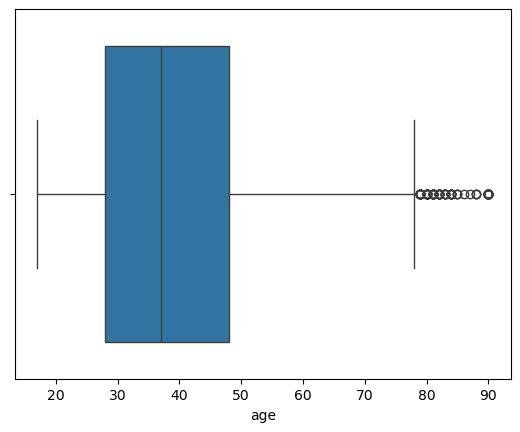

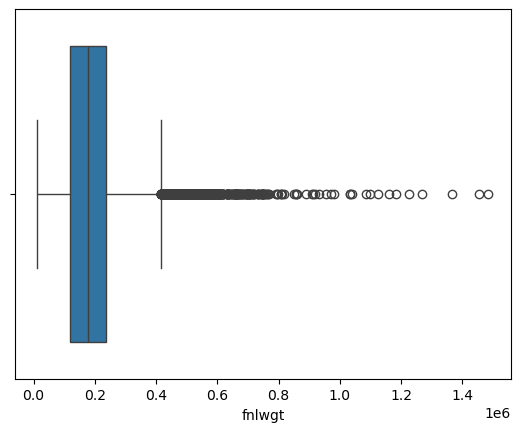

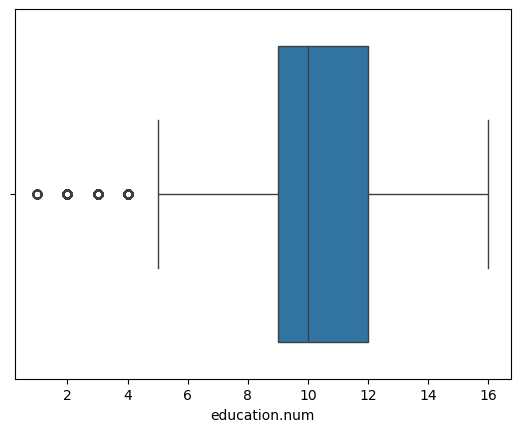

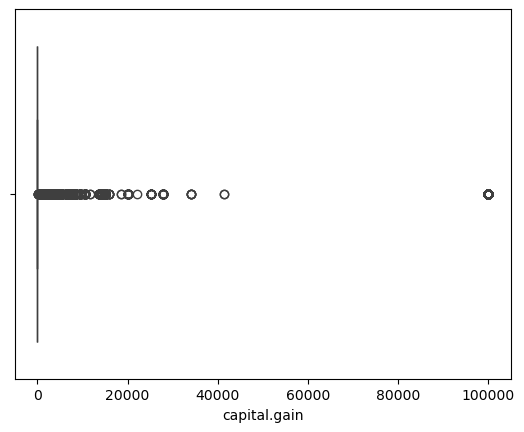

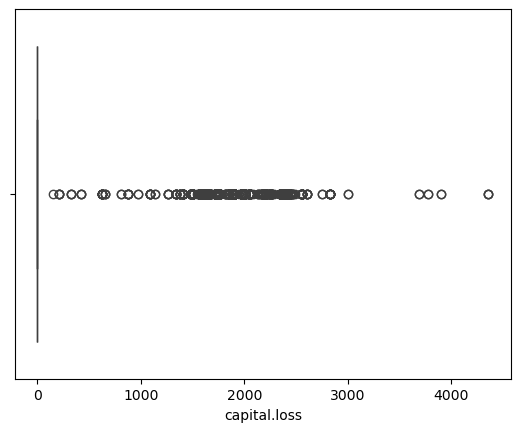

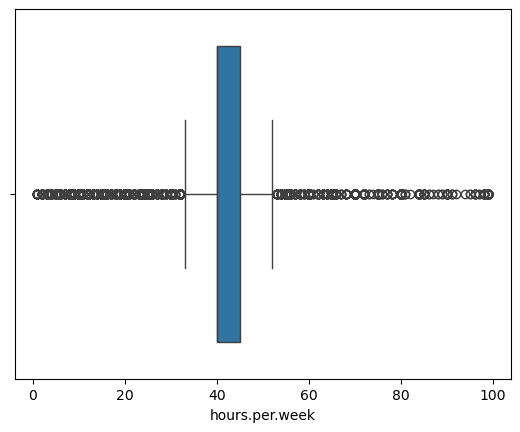

In [13]:
for i in int_columns:
  sns.boxplot(x = data[i])
  plt.show()


> In this part, I set a quantile to get rid of some of the outlier values and filtered accordingly.

In [14]:
q_low = data["fnlwgt"].quantile(0.01)
q_hi  = data["fnlwgt"].quantile(0.99)
data = data[(data["fnlwgt"] < q_hi) & (data["fnlwgt"] > q_low)]


> In the other columns, I got rid of the outliers not with quantile, but according to the filters I decided to apply according to the graphics.

In [15]:
data = data[(data['education.num'] <= 16) | (data['education.num'] >= 4)]
data = data[data['capital.gain'] <= 60000]
data = data[data['capital.loss'] <= 3000]
data = data[(data['hours.per.week'] <= 80) | (data['hours.per.week'] >= 20)]

# Visualizations

First, I looked at the average age by country of those who received more than 50K and I graphed it. For this, I first created a temporary data and used the groupby() function over that data.

In [16]:
temp = data[data["income"] == '>50K']

country_vs_age = data[["native.country","income","age"]].groupby(["native.country","income"]).mean()

In [17]:
country_vs_age = country_vs_age.reset_index()

/tmp/ipykernel_12599/3924345790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "age", y = "native.country", data = country_vs_age, palette = "viridis")


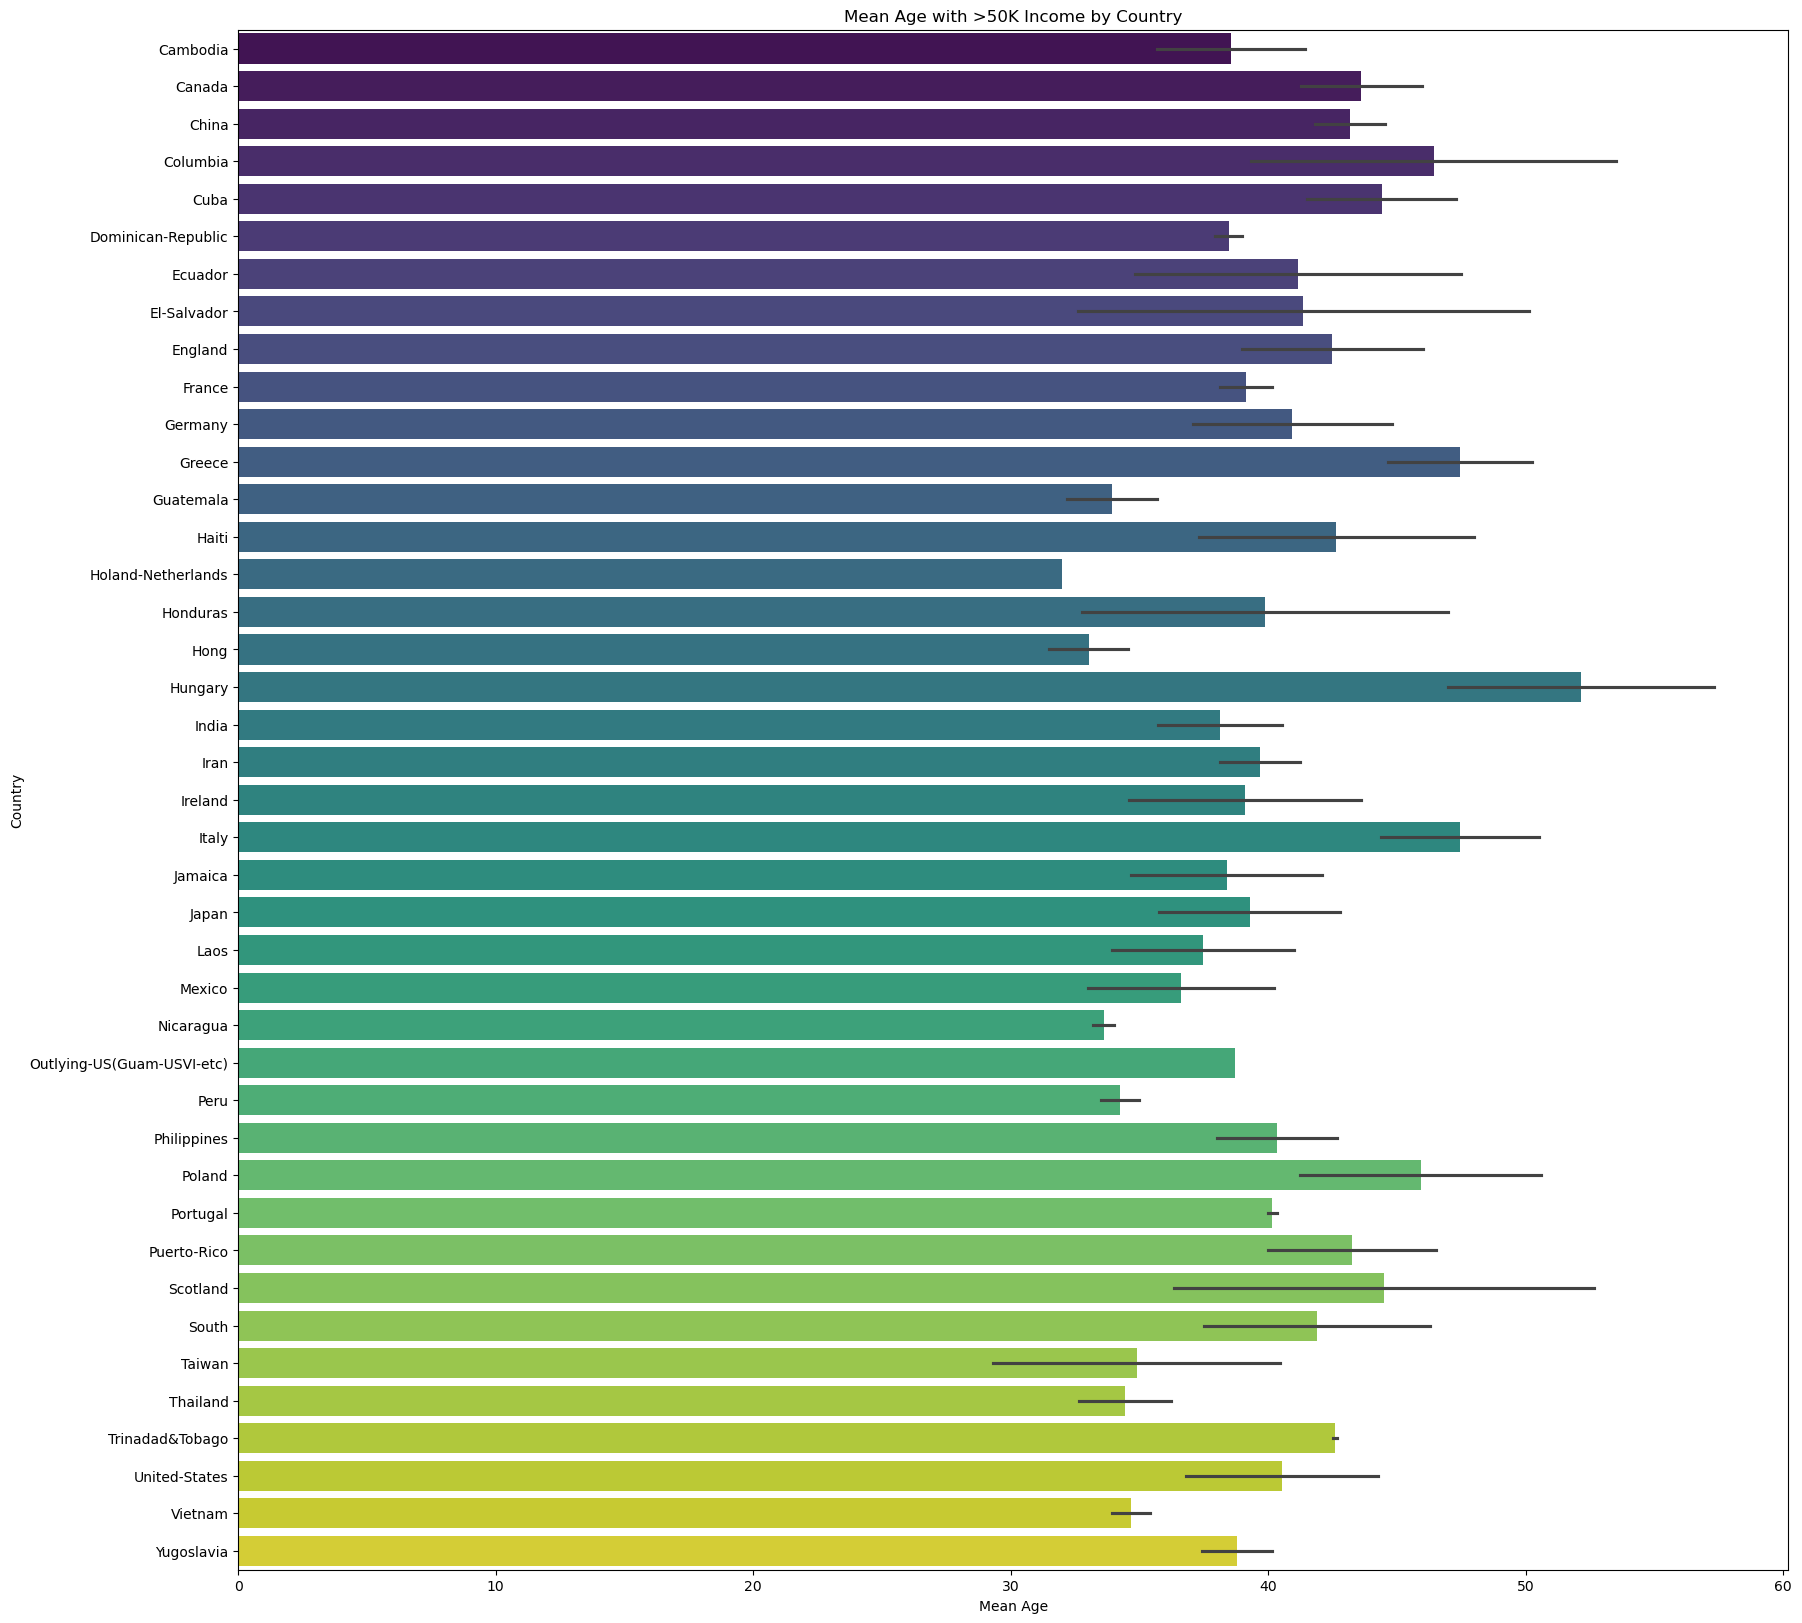

In [18]:
plt.figure(figsize = (20,20))
sns.barplot(x = "age", y = "native.country", data = country_vs_age, palette = "viridis")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with >50K Income by Country")
plt.show()

> Let's look at the education level of those with an income over 50K this time. I could use countplot if I didn't wanted to use the groupby() with count().

In [19]:
education_data = temp.groupby("education")["income"].count()
education_data = education_data.reset_index()

/tmp/ipykernel_12599/2410154321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "education", y ="income", data = education_data, palette = "viridis")


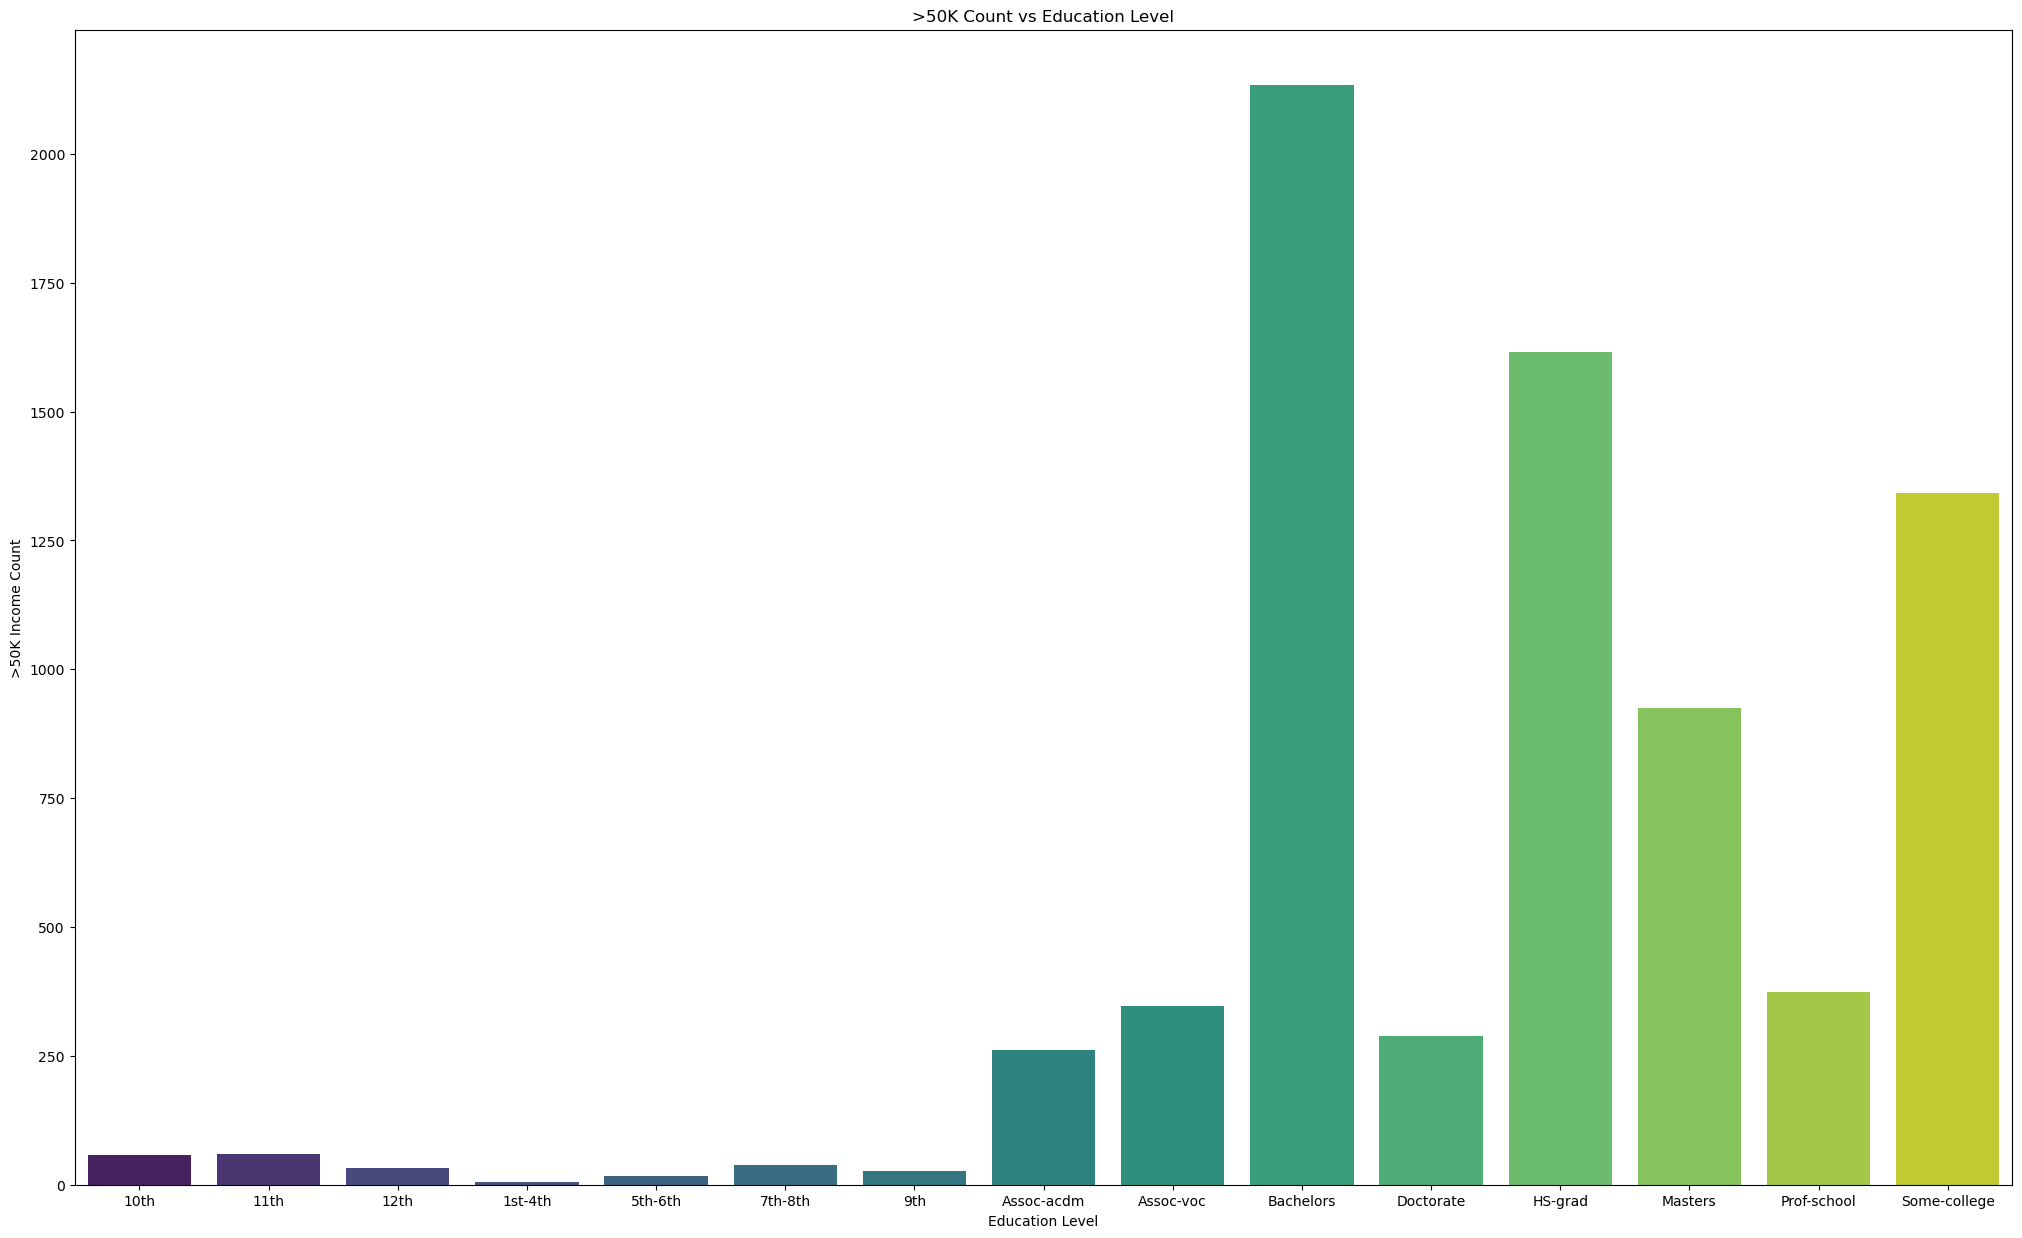

In [20]:
plt.figure(figsize = (25,15))
sns.barplot(x = "education", y ="income", data = education_data, palette = "viridis")
plt.xlabel("Education Level")
plt.ylabel(">50K Income Count")
plt.title(">50K Count vs Education Level")
plt.show()

> Now we can take a look at the workclasses and age by income that I visualized by using hue instead of groupby function.

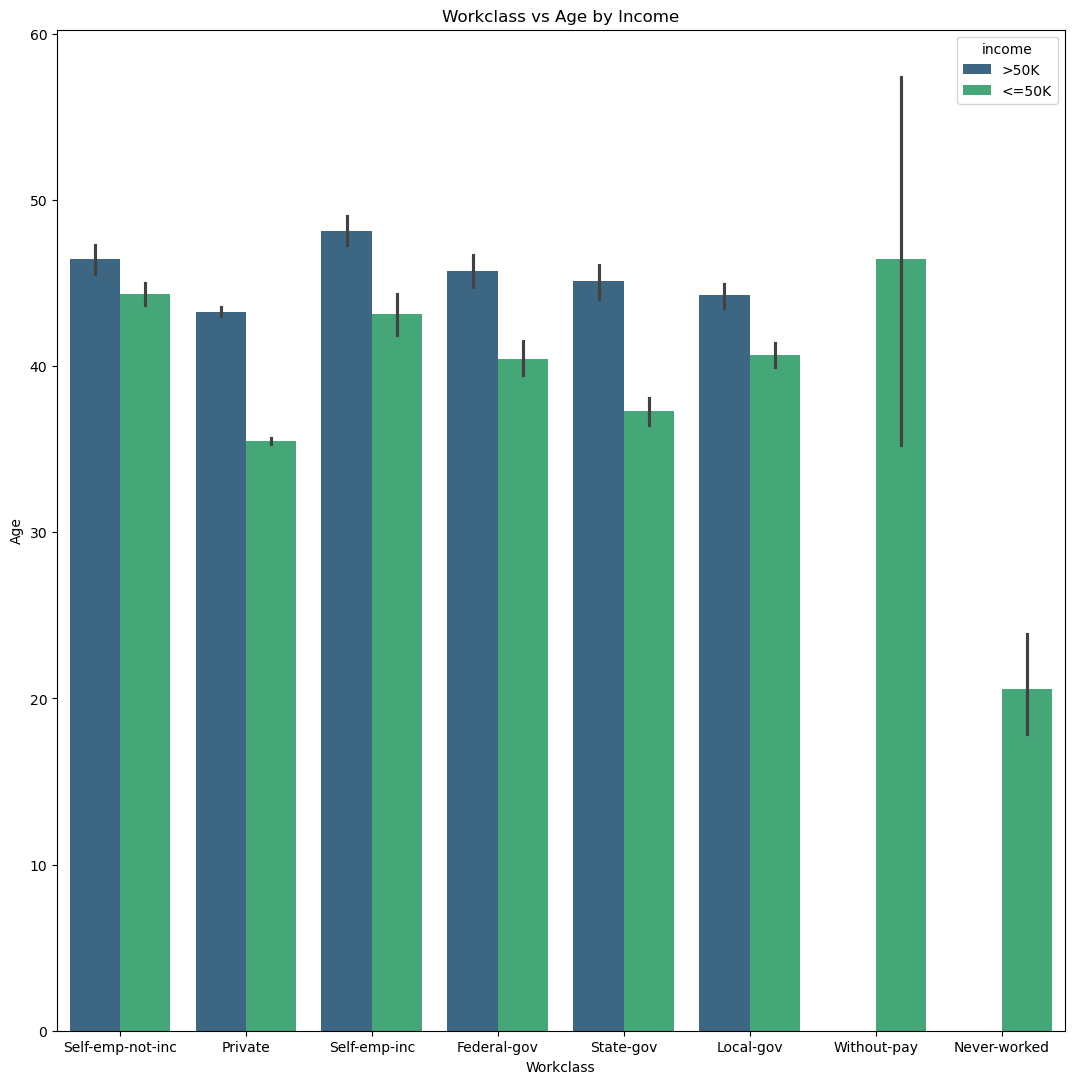

In [21]:
plt.figure(figsize= (13,13))
sns.barplot(x="workclass",y="age", hue="income", data=data, palette = "viridis")
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("Workclass vs Age by Income")
plt.show()

> Finally, we can see the male and female ratios of those with an income above and below 50K from a pie chart.

In [22]:
over_50_data = temp[["sex","income"]].groupby(["sex"]).count()
over_50_data = over_50_data.reset_index()

In [23]:
temp2 = data[data["income"] == '<=50K']
less_50_data = temp2[["sex","income"]].groupby(["sex"]).count()
less_50_data = less_50_data.reset_index()

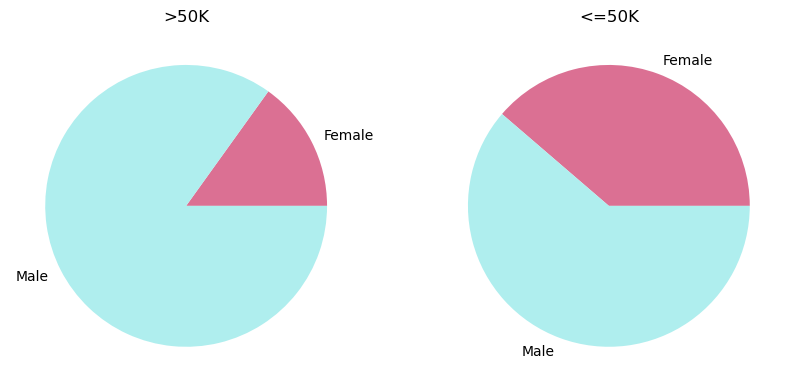

In [24]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = over_50_data["income"], labels = ["Female","Male"],colors = ["palevioletred","paleturquoise"])
plt.title(">50K")

plt.subplot(1,2,2)
plt.pie(x = less_50_data["income"], labels = ["Female","Male"], colors = ["palevioletred","paleturquoise"])
plt.title("<=50K")
plt.show()

> I want to create a model with this data as soon as possible. You can find it on my profile in the future. Thanks :)